In [1]:
from striped.job import StripedSession as Session, IPythonDisplay

from histbook import Hist, beside, groupby, below
from histbook import bin as hbin

#registry_url = "http://ifdb01.fnal.gov:9867"

registry_url = "http://dbwebdev.fnal.gov:9666"
data_server_url = "http://dbweb7.fnal.gov:9091/striped/app"

datasets="""Summer16.GJets_HT-400To600_TuneCUETP8M1_13TeV-madgraphMLM-pythia8
Summer16.GJets_HT-600ToInf_TuneCUETP8M1_13TeV-madgraphMLM-pythia8
Summer16.QCD_HT1000to1500_TuneCUETP8M1_13TeV-madgraphMLM-pythia8
Summer16.QCD_HT1500to2000_TuneCUETP8M1_13TeV-madgraphMLM-pythia8"""
datasets = datasets.split()

In [2]:
#__worker_class__

class Worker(object):

    def columns(self):
        return ["NJets"]

    def process(self, events, emit, params):
        dataset = params["dataset"]
        if dataset.startswith("Summer16."):
            dataset = dataset[9:]
        njets = events.NJets
        emit(NJets = njets, dataset=dataset)
        

Summer16.GJets_HT-400To600_TuneCUETP8M1_13TeV-madgraphMLM-pythia8: 3.310849 million events/second


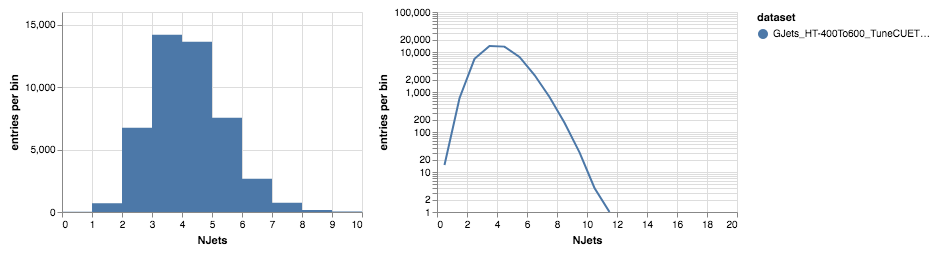

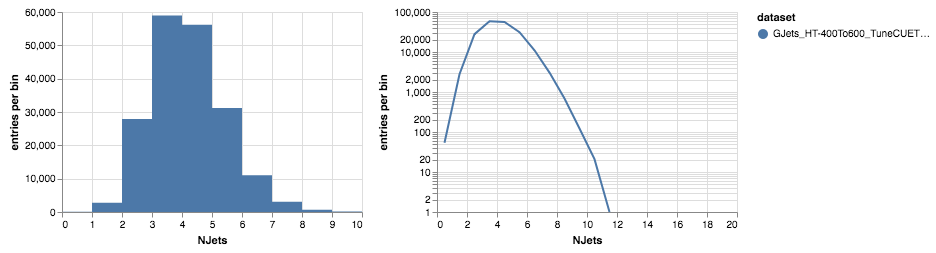

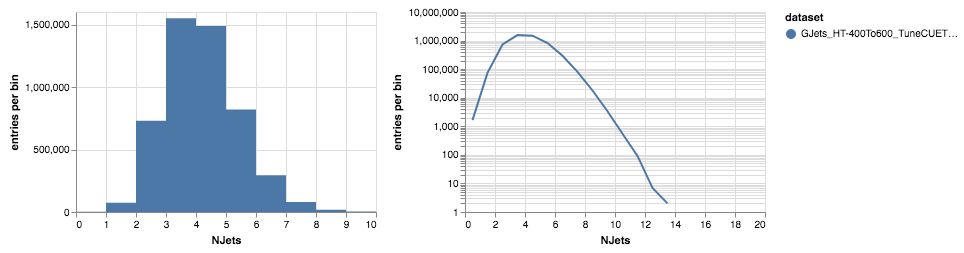

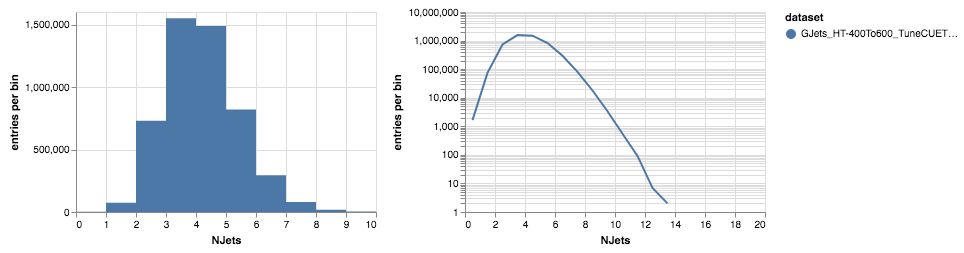

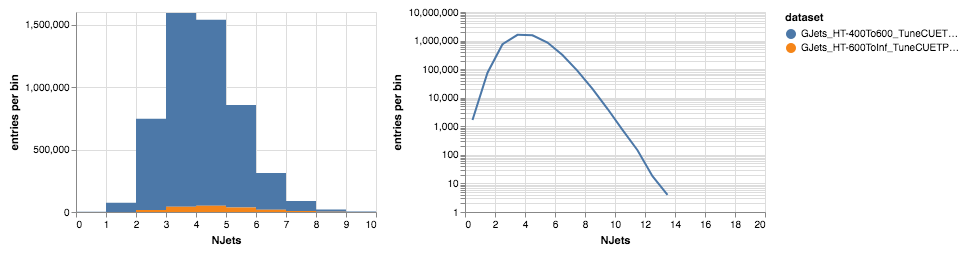

Summer16.GJets_HT-600ToInf_TuneCUETP8M1_13TeV-madgraphMLM-pythia8: 5.780342 million events/second


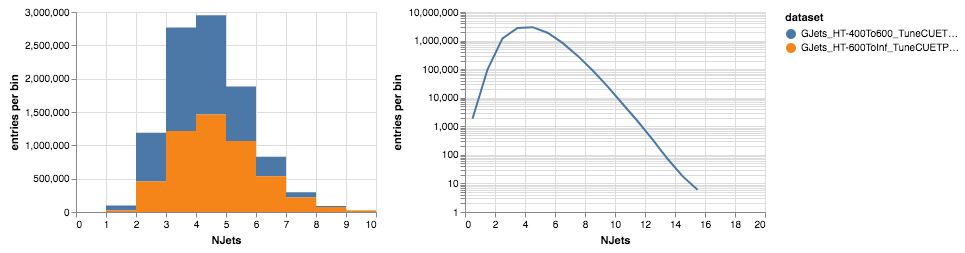

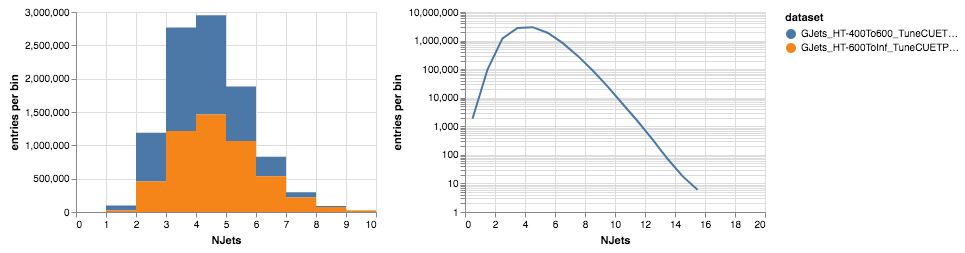

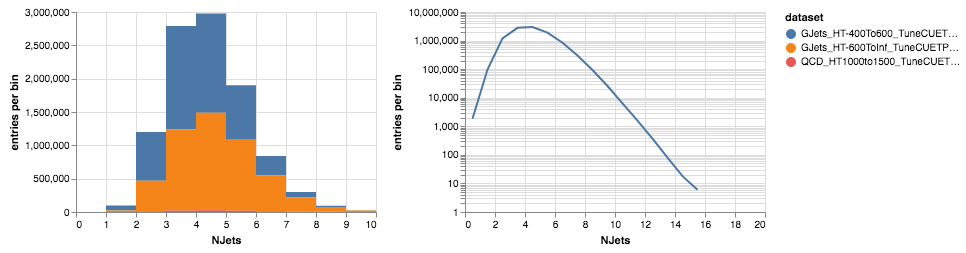

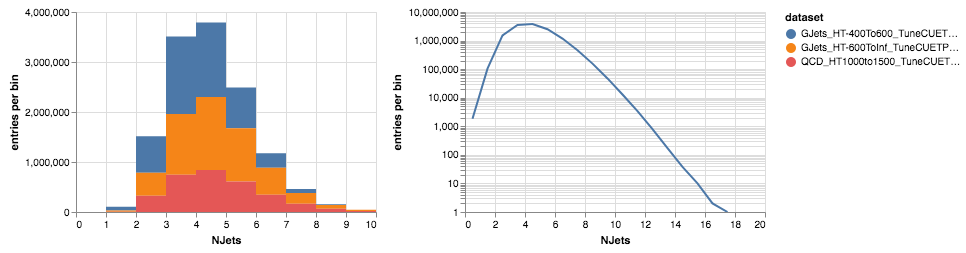

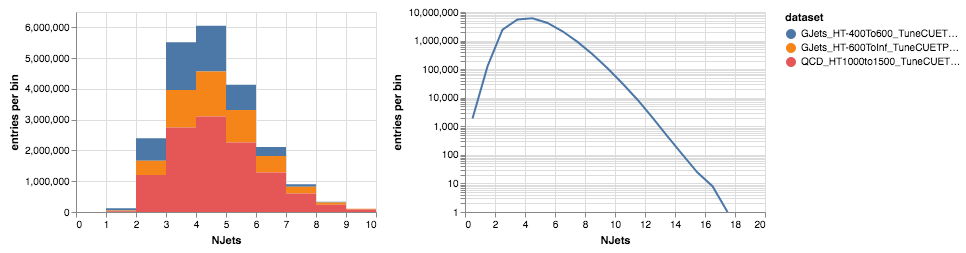

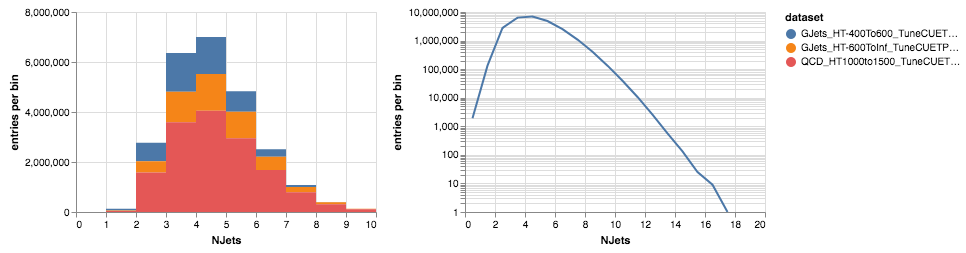

Summer16.QCD_HT1000to1500_TuneCUETP8M1_13TeV-madgraphMLM-pythia8: 5.774999 million events/second


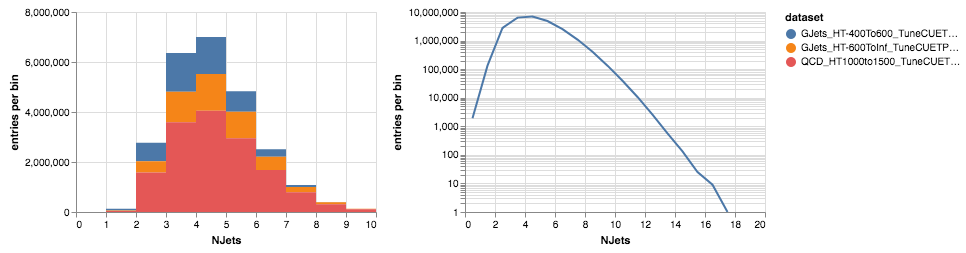

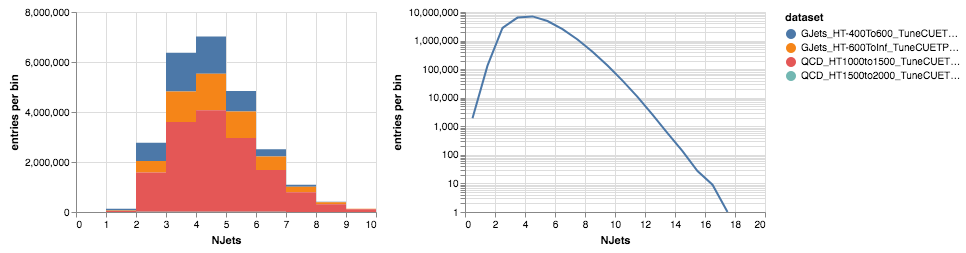

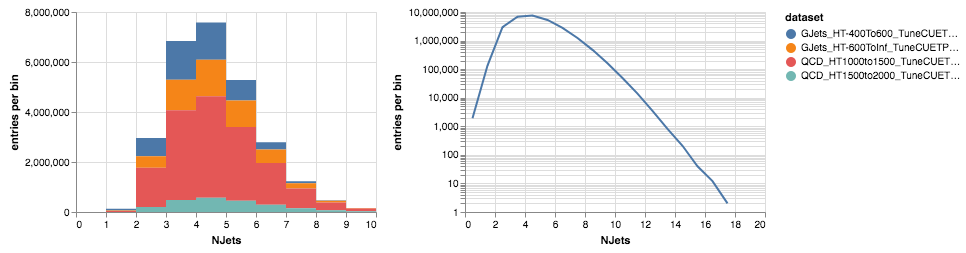

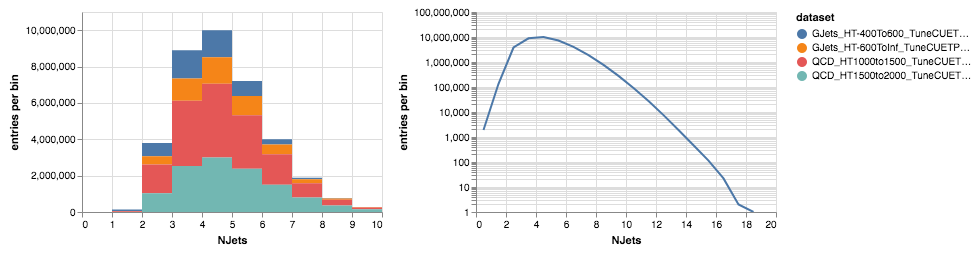

Summer16.QCD_HT1500to2000_TuneCUETP8M1_13TeV-madgraphMLM-pythia8: 5.719730 million events/second


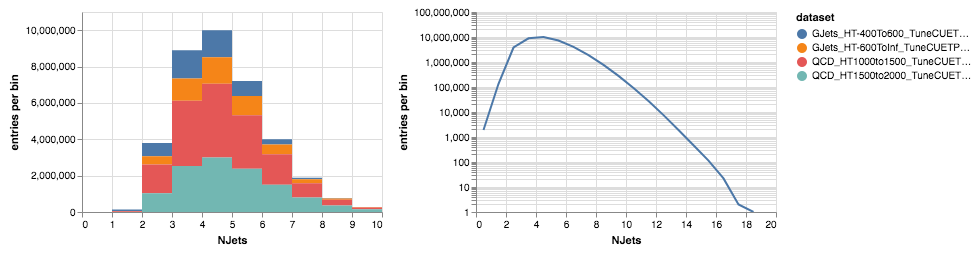

In [6]:
session = Session(data_server_url, registry_url)

h_by_dataset = Hist(hbin("NJets", 10, 0, 10), groupby("dataset", keeporder=True))
h_combined = Hist(hbin("NJets", 20, 0, 20))

disp = beside(
        h_by_dataset
            .stack("dataset")
            .area("NJets", width=300),
        h_combined
            .line("NJets", width=300, yscale={"type":"log"})
    )

display = IPythonDisplay(
    disp
)

last_callback = 0
def callback(typ, nevents, data):
    import json
    #print disp.to(json.dumps)
    display.update()

for dataset_name in datasets[:5]:
    job = session.createJob(dataset_name, user_callback=callback, 
                            user_params = {"dataset":dataset_name})
    job.addHistogram(h_by_dataset, ["NJets", "dataset"], constants={"dataset":dataset_name})
    job.addHistogram(h_combined, "NJets")
    job.run()
    runtime = job.TFinish - job.TStart
    nevents = job.EventsProcessed
    print "%s: %.6f million events/second" % (dataset_name, nevents/runtime/1000000)
    nworkers = len(job.WorkerAddresses)
    display.update()



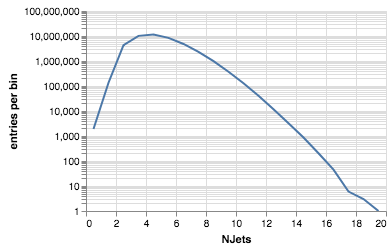

In [4]:
from vega import VegaLite

h_combined.line("NJets", width=300, yscale={"type":"log"}).to(VegaLite)

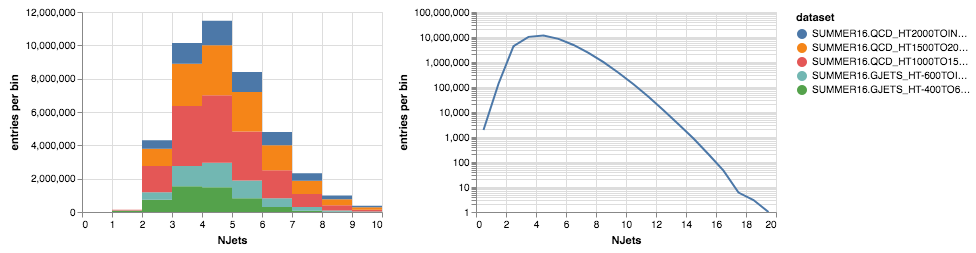

In [5]:
from vega import VegaLite
beside(
        h_by_dataset
            .stack("dataset")
            .area("NJets", width=300),
        h_combined
            .line("NJets", width=300, yscale={"type":"log"})
    ).to(VegaLite)

In [6]:
import json
from vega import VegaLite
beside(
        h_by_dataset
            .stack("dataset")
            .area("NJets", width=300),
        h_combined
            .line("NJets", width=300, yscale={"type":"log"})
    ).to(json.dumps)

'{"$schema": "https://vega.github.io/schema/vega-lite/v2.json", "data": {"values": [{"b0": "SUMMER16.GJETS_HT-400TO600_TUNECUETP8M1_13TEV-MADGRAPHMLM-PYTHIA8", "id": "b", "b2": 0.0, "b1": 0.0}, {"b0": "SUMMER16.GJETS_HT-400TO600_TUNECUETP8M1_13TEV-MADGRAPHMLM-PYTHIA8", "id": "b", "b2": 1649.0, "b1": 1e-09}, {"b0": "SUMMER16.GJETS_HT-400TO600_TUNECUETP8M1_13TEV-MADGRAPHMLM-PYTHIA8", "id": "b", "b2": 73887.0, "b1": 1.0}, {"b0": "SUMMER16.GJETS_HT-400TO600_TUNECUETP8M1_13TEV-MADGRAPHMLM-PYTHIA8", "id": "b", "b2": 730974.0, "b1": 2.0}, {"b0": "SUMMER16.GJETS_HT-400TO600_TUNECUETP8M1_13TEV-MADGRAPHMLM-PYTHIA8", "id": "b", "b2": 1549992.0, "b1": 3.0}, {"b0": "SUMMER16.GJETS_HT-400TO600_TUNECUETP8M1_13TEV-MADGRAPHMLM-PYTHIA8", "id": "b", "b2": 1488282.0, "b1": 4.0}, {"b0": "SUMMER16.GJETS_HT-400TO600_TUNECUETP8M1_13TEV-MADGRAPHMLM-PYTHIA8", "id": "b", "b2": 819667.0, "b1": 5.0}, {"b0": "SUMMER16.GJETS_HT-400TO600_TUNECUETP8M1_13TEV-MADGRAPHMLM-PYTHIA8", "id": "b", "b2": 293552.0, "b1": 6.0}, 